In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TimeSpent': [15, 30, 20, 25, 10, 35, 18, 22, 28, 12],
    'PagesVisited': [5, 8, 6, 7, 4, 9, 6, 7, 8, 5],
    'AddToCart': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    'Purchased': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

# Check if scaling is correct
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])
print(scaled_df.head())


   TimeSpent  PagesVisited  AddToCart  Purchased
0  -0.847306     -1.000000        1.0       -1.0
1   1.108015      1.000000        1.0        1.0
2  -0.195532     -0.333333       -1.0       -1.0
3   0.456242      0.333333        1.0        1.0
4  -1.499079     -1.666667       -1.0       -1.0


In [2]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


[0.79494    0.16180324 0.0406573  0.00259946]


In [3]:
# Check the principal components
components = pca.components_
print(components)


[[ 0.53666675  0.53482062  0.38477417  0.52716652]
 [-0.27806222 -0.33813844  0.89858709 -0.02974952]
 [ 0.42543193  0.25945564  0.20136155 -0.84329353]
 [ 0.67355614 -0.7295972  -0.06279806  0.10033169]]


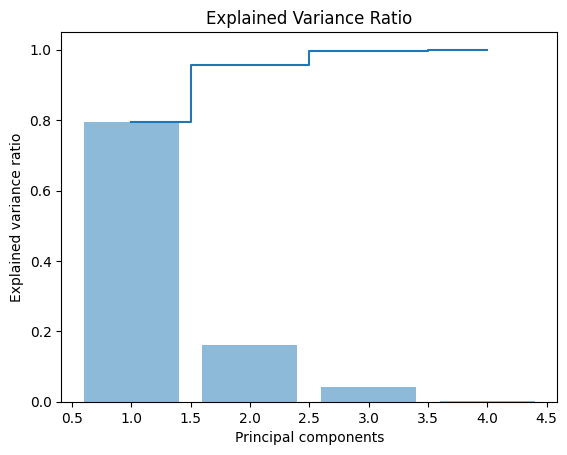

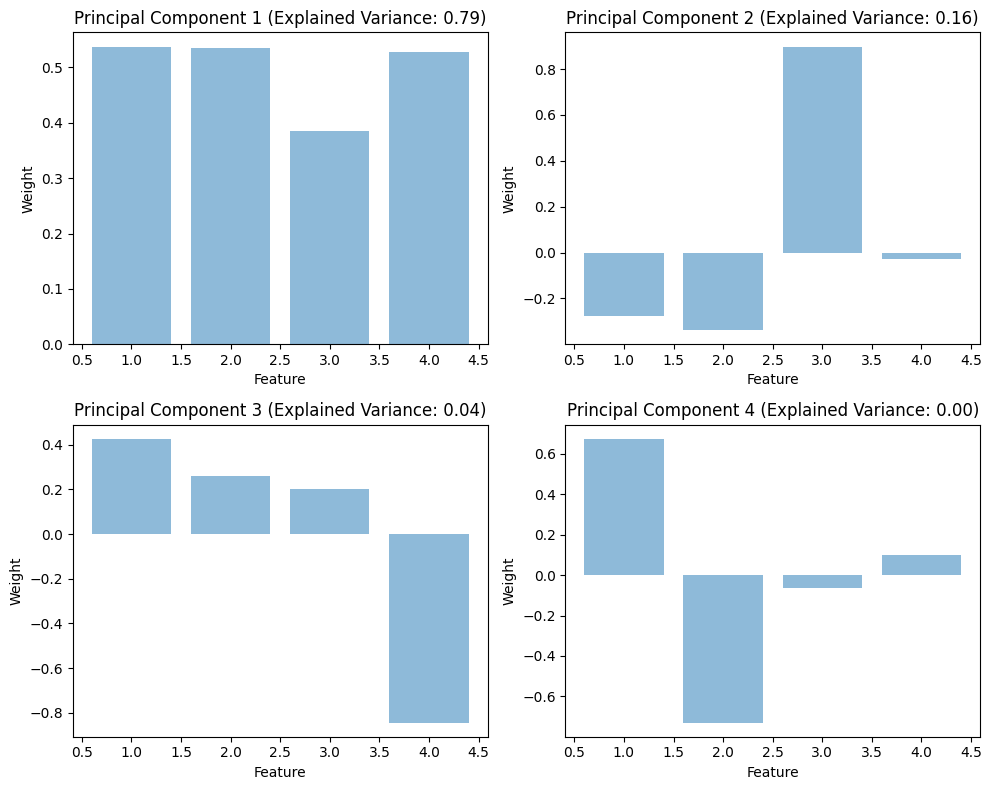

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio')
plt.show()

# Plot principal components
plt.figure(figsize=(10, 8))
for i, (pc, var) in enumerate(zip(components, explained_variance_ratio), start=1):
    plt.subplot(2, 2, i)
    plt.bar(range(1, len(pc) + 1), pc, alpha=0.5, align='center')
    plt.xlabel('Feature')
    plt.ylabel('Weight')
    plt.title(f'Principal Component {i} (Explained Variance: {var:.2f})')
plt.tight_layout()
plt.show()
